# Decision Tree Classifier

Adapt from : https://scikit-learn.org/stable/modules/tree.html

"Decision tree learning is a method commonly used in data mining. The goal is to create a model that predicts the value of a target variable based on several input variables.

A decision tree is a simple representation for classifying examples. For this section, assume that all of the input features have finite discrete domains, and there is a single target feature called the "classification". Each element of the domain of the classification is called a class. A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The arcs coming from a node labeled with an input feature are labeled with each of the possible values of the target feature or the arc leads to a subordinate decision node on a different input feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes, signifying that the data set has been classified by the tree into either a specific class, or into a particular probability distribution (which, if the decision tree is well-constructed, is skewed towards certain subsets of classes).

A tree is built by splitting the source set, constituting the root node of the tree, into subsets—which constitute the successor children. The splitting is based on a set of splitting rules based on classification features. This process is repeated on each derived subset in a recursive manner called recursive partitioning."

https://en.wikipedia.org/wiki/Decision_tree_learning

In [1]:
import sklearn
import pandas as pd
import numpy as np
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


scikit-learn Documentation : https://scikit-learn.org/0.24/

## Read Data

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Pandas
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

###### Iris Flowers

<img src="classes.jpeg" alt="Chansey" width="800"/>

###### Flower Parts

<img src="flower-parts.png" alt="Chansey" width="200"/>

## Data Exploration

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Plot

In [8]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']

#### Sepal

--> Plotting class 0
...50 dots - color red
--> Plotting class 1
...50 dots - color green
--> Plotting class 2
...50 dots - color blue


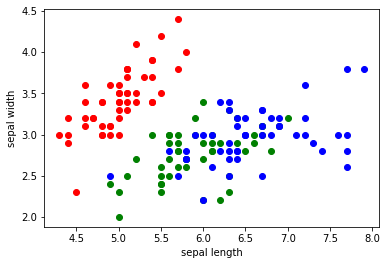

In [9]:
for i in range(0, 3):
    print(f"--> Plotting class {i}")
    one_class_df = df[df['target']==i]
    print(f"...{one_class_df.shape[0]} dots - color {colors[i]}")
    # plot
    plt.scatter(
        one_class_df['sepal length (cm)'], one_class_df['sepal width (cm)'],  color=colors[i]
    )

  
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

#### Petal

--> Plotting class 0
...50 dots - color red
--> Plotting class 1
...50 dots - color green
--> Plotting class 2
...50 dots - color blue


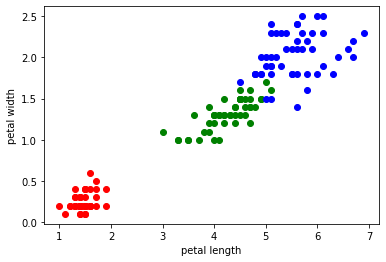

In [10]:
for i in range(0, 3):
    print(f"--> Plotting class {i}")
    one_class_df = df[df['target']==i]
    print(f"...{one_class_df.shape[0]} dots - color {colors[i]}")
    # plot
    plt.scatter(
        one_class_df['petal length (cm)'], one_class_df['petal width (cm)'],  color=colors[i]
    )

  
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()


--> Petal has High Class Correlation

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

## Creating the ML Model

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

[Text(181.35000000000002, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.666\nsamples = 97\nvalue = [31, 33, 33]'),
 Text(153.45000000000002, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(209.25000000000003, 170.84571428571428, 'X[3] <= 1.75\ngini = 0.5\nsamples = 66\nvalue = [0, 33, 33]'),
 Text(139.5, 139.78285714285715, 'X[2] <= 5.35\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 4.95\ngini = 0.111\nsamples = 34\nvalue = [0, 32, 2]'),
 Text(55.800000000000004, 77.65714285714284, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(27.900000000000002, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(83.7, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.4, 77.65714285714284, 'X[1] <= 2.25\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(139.5, 46.59428571428572, 'X[3] <= 1.25\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(111.60000000

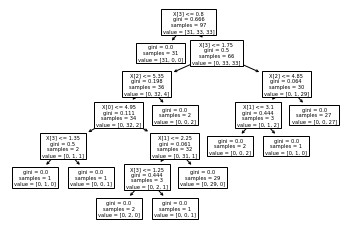

In [14]:
tree.plot_tree(clf)

In [15]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- petal width (cm) <= 1.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal width (cm) >  1.35
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- sepal width (cm) <= 2.25
|   |   |   |   |   |--- petal width (cm) <= 1.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal width (cm) >  1.25
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.25
|   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal 

###### Prediction

In [16]:
print(f"1st Test Row : sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm)")
X_test[0]

1st Test Row : sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm)


array([6.1, 2.8, 4.7, 1.2])

In [17]:
print("The class is :")
y_test[0]

The class is :


1

In [18]:
X_test_1st_row_2d_array = np.array([X_test[0]])
y_pred = clf.predict(X_test_1st_row_2d_array)
print(f"Prediction is {y_pred}")

Prediction is [1]


###### Classification Accuracy

"Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples."

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

Classification Accuracy = Number of Correct Predictions / Total number of predictions

In [19]:
print("Train Score")
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

Train Score


1.0

In [20]:
print("Test Score")
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

Test Score


0.9622641509433962

Very good on Train Data, not so good on Test Data : Overfitting

## Grid Search

###### Grid-Search

"Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model."

https://elutins.medium.com/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

In [21]:
from sklearn.model_selection import ParameterGrid
tree_param = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,5]}
combinations = list(ParameterGrid(tree_param)) 
print(combinations)

[{'max_depth': 1, 'min_samples_leaf': 1}, {'max_depth': 1, 'min_samples_leaf': 2}, {'max_depth': 1, 'min_samples_leaf': 3}, {'max_depth': 1, 'min_samples_leaf': 5}, {'max_depth': 2, 'min_samples_leaf': 1}, {'max_depth': 2, 'min_samples_leaf': 2}, {'max_depth': 2, 'min_samples_leaf': 3}, {'max_depth': 2, 'min_samples_leaf': 5}, {'max_depth': 3, 'min_samples_leaf': 1}, {'max_depth': 3, 'min_samples_leaf': 2}, {'max_depth': 3, 'min_samples_leaf': 3}, {'max_depth': 3, 'min_samples_leaf': 5}, {'max_depth': 4, 'min_samples_leaf': 1}, {'max_depth': 4, 'min_samples_leaf': 2}, {'max_depth': 4, 'min_samples_leaf': 3}, {'max_depth': 4, 'min_samples_leaf': 5}, {'max_depth': 5, 'min_samples_leaf': 1}, {'max_depth': 5, 'min_samples_leaf': 2}, {'max_depth': 5, 'min_samples_leaf': 3}, {'max_depth': 5, 'min_samples_leaf': 5}, {'max_depth': 6, 'min_samples_leaf': 1}, {'max_depth': 6, 'min_samples_leaf': 2}, {'max_depth': 6, 'min_samples_leaf': 3}, {'max_depth': 6, 'min_samples_leaf': 5}, {'max_depth': 7

In [22]:
max_test_score = 0
best_clf = None

for combination in combinations:
    print(f"--> combination : {combination}")
    clf = tree.DecisionTreeClassifier(max_depth=combination['max_depth'],
                                      min_samples_leaf=combination['min_samples_leaf'],
                                      random_state=0)
    clf = clf.fit(X_train, y_train)

    # Train Score:
    y_pred = clf.predict(X_train)
    print(f"... Train Score : {accuracy_score(y_train, y_pred)}")
    
    # Test Score:
    y_pred = clf.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print(f"... Test Score : {test_score}")
    
    if test_score > max_test_score:
        print(f"... best test_score until now: {test_score}")
        max_test_score = test_score
        best_clf = clf
        
# clf is going to have the best Test Score classifier 
print(f"==> max_test_score: {max_test_score}")
clf = best_clf

--> combination : {'max_depth': 1, 'min_samples_leaf': 1}
... Train Score : 0.6597938144329897
... Test Score : 0.6792452830188679
... best test_score until now: 0.6792452830188679
--> combination : {'max_depth': 1, 'min_samples_leaf': 2}
... Train Score : 0.6597938144329897
... Test Score : 0.6792452830188679
--> combination : {'max_depth': 1, 'min_samples_leaf': 3}
... Train Score : 0.6597938144329897
... Test Score : 0.6792452830188679
--> combination : {'max_depth': 1, 'min_samples_leaf': 5}
... Train Score : 0.6597938144329897
... Test Score : 0.6792452830188679
--> combination : {'max_depth': 2, 'min_samples_leaf': 1}
... Train Score : 0.9484536082474226
... Test Score : 0.9811320754716981
... best test_score until now: 0.9811320754716981
--> combination : {'max_depth': 2, 'min_samples_leaf': 2}
... Train Score : 0.9484536082474226
... Test Score : 0.9811320754716981
--> combination : {'max_depth': 2, 'min_samples_leaf': 3}
... Train Score : 0.9484536082474226
... Test Score : 0.

In [23]:
print(clf)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=0)


In [24]:
print("Train Score")
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)

Train Score


0.9587628865979382

In [25]:
print("Test Score")
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

Test Score


1.0

###### Overfitting

Overfitting is a concept in data science, which occurs when a statistical model fits exactly against its training data. When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data.

https://www.ibm.com/cloud/learn/overfitting#:~:text=Overfitting%20is%20a%20concept%20in,exactly%20against%20its%20training%20data.&text=When%20the%20model%20memorizes%20the,generalize%20well%20to%20new%20data.

In [26]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



PS: For grid search it would be better using cross-validation (train data, test data and validation data). But to make the example simple (learning purposes), I did not use Cross Validation